In [194]:
import os
import math
import sys
import importlib

import numpy as np
np.set_printoptions(suppress=True)
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from keras import backend as bkend
from autoencoders_keras.get_session import get_session
import keras.backend.tensorflow_backend as KTF
KTF.set_session(get_session(gpu_fraction=0.75, allow_soft_placement=True, log_device_placement=False))

import tensorflow as tf
from tensorflow.python.client import device_lib
os.environ["KERAS_BACKEND"] = "tensorflow"
importlib.reload(bkend)
print(device_lib.list_local_devices())



[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 16865762909728004287
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 3730735104
locality {
  bus_id: 1
  links {
  }
}
incarnation: 8259617840521707588
physical_device_desc: "device: 0, name: Tesla K20c, pci bus id: 0000:04:00.0, compute capability: 3.5"
]


Using TensorFlow backend.


In [196]:
from autoencoders_keras.convolutional2D_autoencoder import Convolutional2DAutoencoder

In [197]:
N0 = 32
N1 = 20

In [126]:
convolutional2D_autoencoder = Convolutional2DAutoencoder(input_shape=(N0, N1, 1),
                                                         n_epoch=5,
                                                         batch_size=100,
                                                         encoder_layers=3,
                                                         decoder_layers=3,
                                                         filters=100,
                                                         kernel_size=(8, 8),
                                                         strides=(1, 1),
                                                         pool_size=(4, 4),
                                                         denoising=None)

In [142]:
def get_synth_data(N):
    Y0 = np.random.uniform(size=(N0, N1))
    idx0 = np.argsort(Y0.mean(axis=1))
    idx1 = np.argsort(Y0.mean(axis=0))[::-1]
    Y0 = Y0[idx0][:, idx1]

    Y1 = np.random.uniform(size=(N0, N1))
    idx0 = np.argsort(Y1.mean(axis=1))
    idx1 = np.argsort(Y1.mean(axis=0))
    Y1 = Y1[idx0][:, idx1]

    X0 = (np.random.uniform(size=(N, N0, N1))@Y0.T)@Y0
    X1 = (np.random.uniform(size=(N, N0, N1))@Y1.T)@Y1

    X = np.concatenate([X0, X1]).reshape((2*N, N0, N1, 1))
    M = X.max()
    m = X.min()

    X = (X - m) / (M - m)
    np.random.shuffle(X)
    return X

In [143]:
X = get_synth_data(10000)

In [144]:
convolutional2D_autoencoder.fit(X)

Train on 14000 samples, validate on 6000 samples
Epoch 1/5
14000/14000 [==============================] - 89s 6ms/step - loss: 0.1924 - val_loss: 0.2523
Epoch 2/5
14000/14000 [==============================] - 89s 6ms/step - loss: 0.0792 - val_loss: 0.1241
Epoch 3/5
14000/14000 [==============================] - 89s 6ms/step - loss: 0.0464 - val_loss: 0.0765
Epoch 4/5
14000/14000 [==============================] - 89s 6ms/step - loss: 0.0332 - val_loss: 0.0515
Epoch 5/5
14000/14000 [==============================] - 89s 6ms/step - loss: 0.0259 - val_loss: 0.0224


Convolutional2DAutoencoder(batch_size=100, decoder_layers=3, denoising=None,
              encoder_layers=3, filters=100, input_shape=(32, 20, 1),
              kernel_size=(8, 8), n_epoch=5, pool_size=(4, 4),
              strides=(1, 1))

In [188]:
XX = get_synth_data(300)
X_t = convolutional2D_autoencoder.transform(XX)

In [189]:
from sklearn.decomposition import FastICA

In [190]:
x, y = PCA(n_components=2).fit_transform(X_t).T

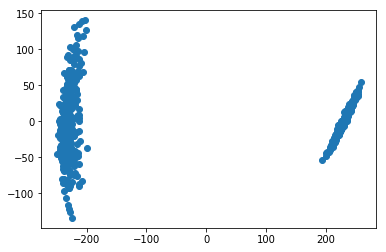

In [191]:
plt.scatter(x, y)